## Determining velocity from marks on paper (or any data gathered in regular time intervals)

This notebook calculates the speed of anything from data of differential distance made between regular timing events.

The input values should be the distances between marks, or generally the distances traveled between two consecutive timing events.

In [8]:
import numpy as np
from matplotlib import pyplot as plt

dt = 0.02 # 20 ms

### Example 1: linear data analysis

This idea is that the whole data set represents linear motion and a linear fit will be made on all of it.

x(t) = (24.39+-0.13)t + (-9.26+-1.85)
speed = 1.22 m/s



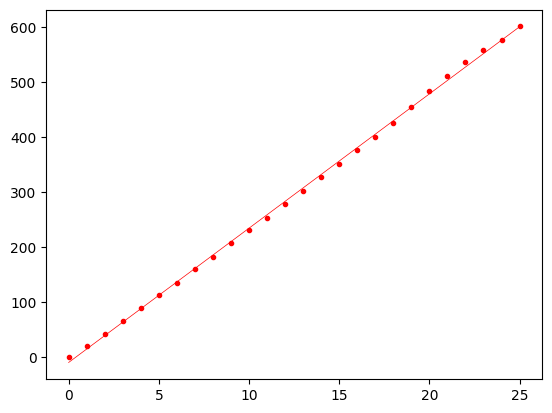

In [9]:
linear = np.array([0, 20, 23, 23, 23, 25, 22, 24, 23, 25, 23, 23, 24, 24, 25, 25, 24, 24, 26, 29, 28, 28, 25, 22, 19, 24]) # delta-X in mm

linear = np.array([sum(linear[:n]) for n in range(1, len(linear)+1)])
ts = np.arange(len(linear))

lin_coefs, lin_vars = np.polyfit(ts, linear, 1, cov=True)
print("x(t) = ({:.2f}+-{:.2f})t + ({:.2f}+-{:.2f})".format(
    lin_coefs[0], np.sqrt(lin_vars[0][0]), lin_coefs[1], np.sqrt(lin_vars[1][1])))

speed = (lin_coefs[0]/1000)/dt
print("speed = {:.2f} m/s".format(speed))

plt.plot(ts, linear, 'r.')
plt.plot(ts, lin_coefs[0]*ts + lin_coefs[1], 'r-', linewidth=0.5)
print()

### Example 2: non-linear data analysis

This idea is that parts of the data set represent linear motion and a linear fits will be made on just those subsets of data.

x0(t) = ( 11.39+- 0.37)t + (  -1.46+- 1.33) => v0 = 0.57 m/s
x1(t) = ( 66.80+- 0.95)t + (-396.60+- 9.55) => v1 = 3.34 m/s
x2(t) = (  5.31+- 0.80)t + ( 405.98+-13.32) => v2 = 0.27 m/s



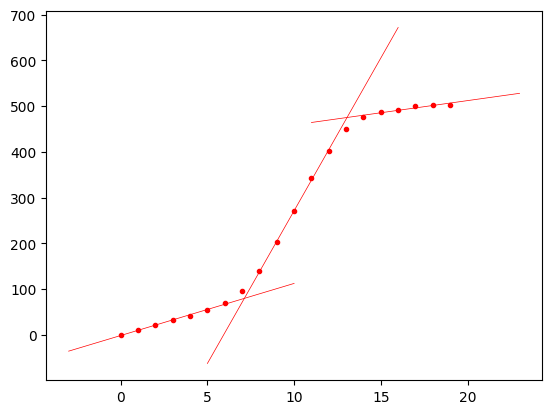

In [17]:
nonlinear = np.array([0, 10, 11, 11, 10, 12, 16, 26, 43, 63, 69, 71, 61, 47, 27, 10, 5, 8, 3, 0]) # delta-X in mm

nonlinear = np.array([sum(nonlinear[:n]) for n in range(1, len(nonlinear)+1)])
ts = np.arange(len(nonlinear))

linear_starts = [0, 8, 14] # input: the estimated data points where linear motion starts
linear_ends = [7, 13, 20] # input: the estimated data points where linear motion ends

lin_coefs_list = []
for i in range(len(linear_starts)):
    lin_coefs, lin_vars = np.polyfit(ts[linear_starts[i]:linear_ends[i]],
                                     nonlinear[linear_starts[i]:linear_ends[i]],
                                     1, cov=True)
    lin_coefs_list.append(lin_coefs)
    speed = (lin_coefs[0]/1000)/dt
    print("x{:}(t) = ({:6.2f}+-{:5.2f})t + ({:7.2f}+-{:5.2f}) => v{:} = {:.2f} m/s".format(
        i, lin_coefs[0], np.sqrt(lin_vars[0][0]), lin_coefs[1], np.sqrt(lin_vars[1][1]),
        i, speed))
print()
plt.plot(ts, nonlinear, 'r.')
for i in range(len(linear_ends)):
    lin_ts = np.linspace(linear_starts[i]-3, linear_ends[i]+3, 100)
    plt.plot(lin_ts, lin_coefs_list[i][0]*lin_ts + lin_coefs_list[i][1], 'r-', linewidth=0.5)